<a href="https://colab.research.google.com/github/palakr0110/Bank_Marketing/blob/main/Copy_of_bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


# Dataset Description

The data is related with direct marketing campaigns of a Portuguese banking
institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.
Attribute/Features Description:
Dataset has 17 attributes including one dependent attribute and there are 45211 instances/datapoints. So we have 16 independent attributes and 1 dependent attribute.

# Bank client attributes:


*  age: age of client (numeric)
*  job : type of job (categorical: "admin.", "unknown", "unemployed",        
          "management", "housemaid", "entrepreneur", "student", "blue-collar",    "self-employed", "retired", "technician", "services")
*  marital : marital status (categorical: "married", "divorced", "single")
*  education: client highest education (categorical: "unknown", "secondary", "primary", "tertiary")
* default: has credit in default? (binary/2-categories: "yes", "no")
* balance: average yearly balance, in euros (numeric)
* housing: has housing loan? (binary/2-categories: "yes", "no")
* has personal loan? (binary/2-categories: "yes", "no")

# Related with the last contact of the current campaign

*  contact: contact communication type (categorical: "unknown", "telephone", "cellular")
*  day: last contact day of the month (numeric)
*  month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")


# Other attributes:

*   campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
*   pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
*   previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign ( categorical: 'unknown","other", "failure", "success")
  
# Output variable (desired target)

* y: has the client subscribed a term deposit? (binary: "yes", "no")










In [ ]:
from google.colab import files
files.upload

<function google.colab.files.upload()>

In [ ]:
df = pd.read_csv('bank_marketing.csv')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.shape

(41188, 20)

In [ ]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

Print unique values for each column

In [ ]:
cat_cols=df.select_dtypes(include='object')

In [ ]:
for col in cat_cols.columns:
    print("Unique values in column:",col )
    print(cat_cols[col].unique())
    print(sep = '\n' )
    print("value counts in column",col )
    print(cat_cols[col].value_counts())
    print("_________________________________")

Unique values in column: job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

value counts in column job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
_________________________________
Unique values in column: marital
['married' 'single' 'divorced' 'unknown']

value counts in column marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
_________________________________
Unique values in column: education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

value counts in column education
university.degree      12168
high.

In [ ]:
numeric_cols=df.select_dtypes(include=np.number)
numeric_cols.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
categorical_cols=df.select_dtypes(include='object')

In [ ]:
categorical_cols.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


Exploratory Data Analysis

Univariate Analysis

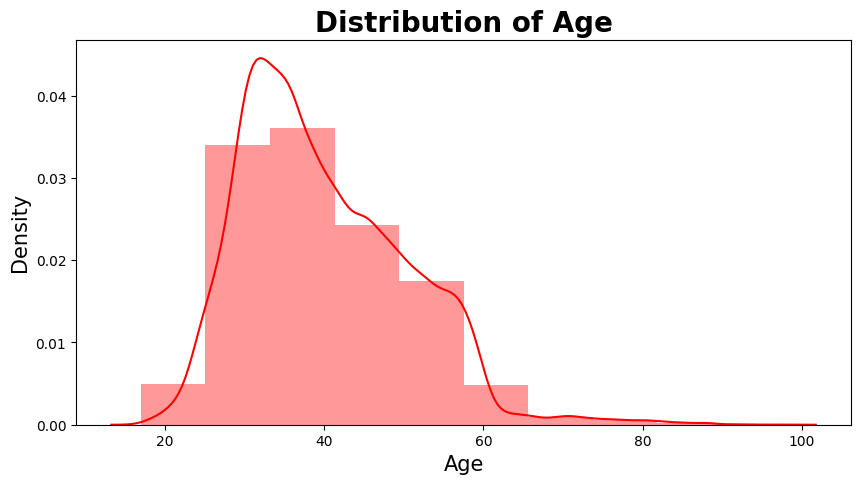

In [ ]:
# Age

plt.figure(figsize = (10, 5))
sns.distplot(df['age'], color ='red', bins = 10)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Distribution of Age', fontsize = 20, weight = 'bold')
plt.show();

* Age is right skewed.
* Minimum age and Maximum age is 18 and 95 respectively
* Most of the clients are in the age bracket of 25 to 60 years



TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

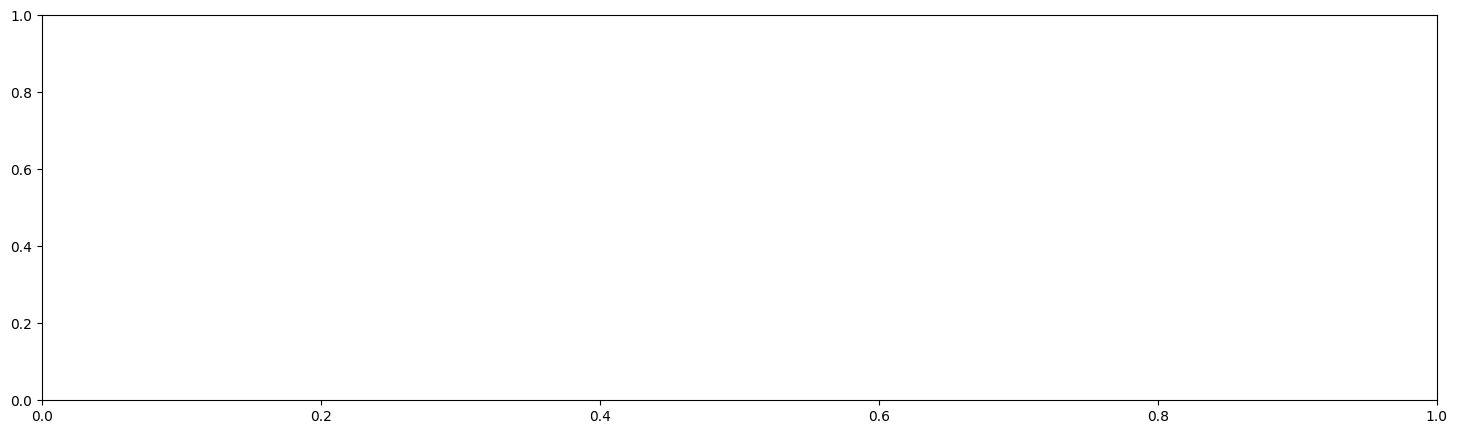

In [ ]:
# Job

f, ax = plt.subplots(figsize=(18, 5))
job = df['job'].value_counts()
cplot = sns.barplot(job.index, job, palette='twilight_shifted')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height), xy=(count.get_x() + count.get_width() / 2, height),
                ha='center', va='bottom')
cplot.set_title('Job', fontsize=20, weight='bold')
cplot.set_ylabel('Count of each Job', fontsize=15)
cplot.set_xlabel('Job names', fontsize=15)


* There exists around 12 different type of job profiles.
* Top 3 job profiles are blue-collar, managment and technician which contains.






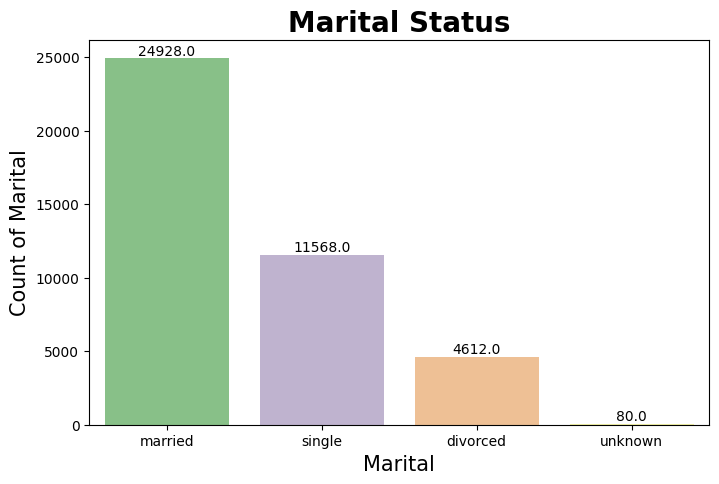

In [ ]:
# Marital

f, ax = plt.subplots(figsize=(8, 5))
marital_status = df['marital'].value_counts()
cplot = sns.barplot(x=marital_status.index, y=marital_status, palette='Accent')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height), xy=(count.get_x() + count.get_width() / 2, height),
                ha='center', va='bottom')
cplot.set_title('Marital Status', fontsize=20, weight='bold')
cplot.set_ylabel('Count of Marital', fontsize=15)
cplot.set_xlabel('Marital', fontsize=15)
plt.show()


Around 60% of our client base is married, 28% is single and 12% are divorced.

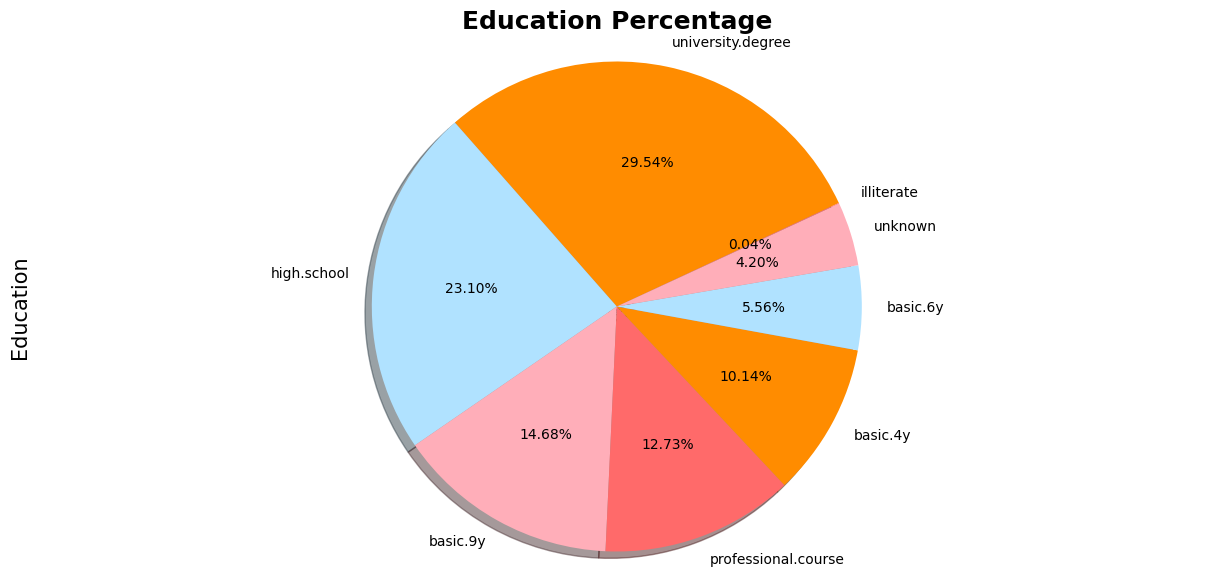

In [ ]:
# Education

fig, ax = plt.subplots(figsize = (15, 7))
colors = ['#FF8C00', '#B0E2FF', '#FFAEB9', '#FF6A6A']
explode = (0, 0.1, 0.1, 0.1)
ax = df.education.value_counts().plot(kind = 'pie',
                                      colors = colors, shadow = True,
                                      startangle = 25, autopct ='%1.2f%%')
plt.title('Education Percentage', fontsize = 18, weight = 'bold')
plt.ylabel('Education', fontsize = 15)
plt.axis('equal')
plt.show()

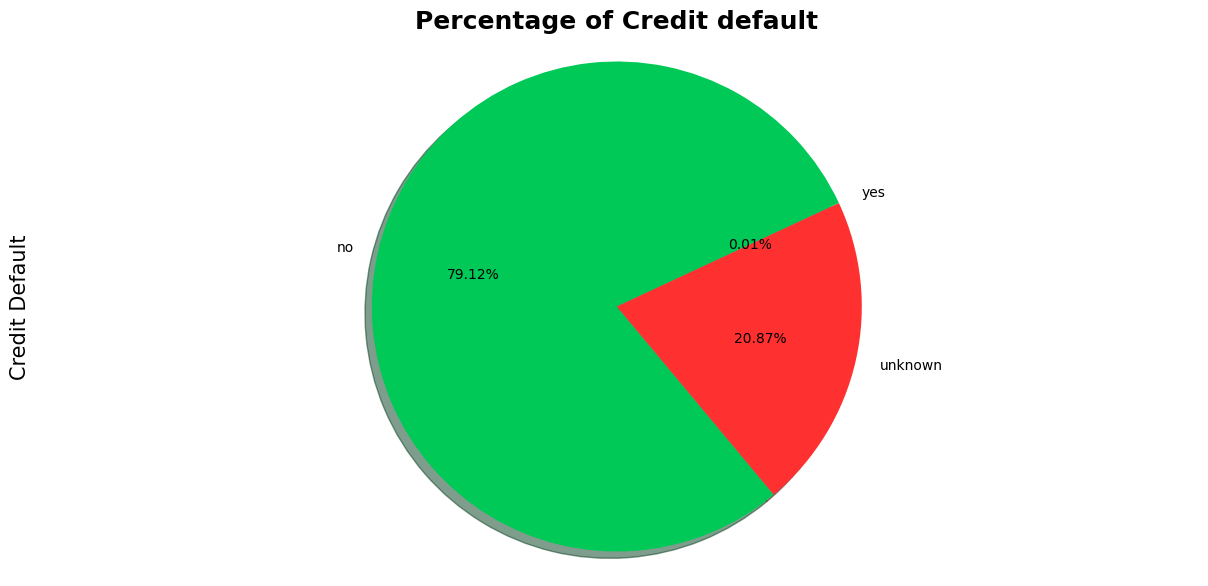

In [ ]:
# Default

fig, ax = plt.subplots(figsize = (15, 7))
colors = ['#00C957', '#FF3030']
explode = (0.25, 0.1)
ax = df.default.value_counts().plot(kind = 'pie',
                                      colors = colors, shadow = True,
                                      startangle = 25, autopct ='%1.2f%%')
plt.title('Percentage of Credit default', fontsize = 18, weight = 'bold')
plt.ylabel('Credit Default', fontsize = 15)
plt.axis('equal')
plt.show()

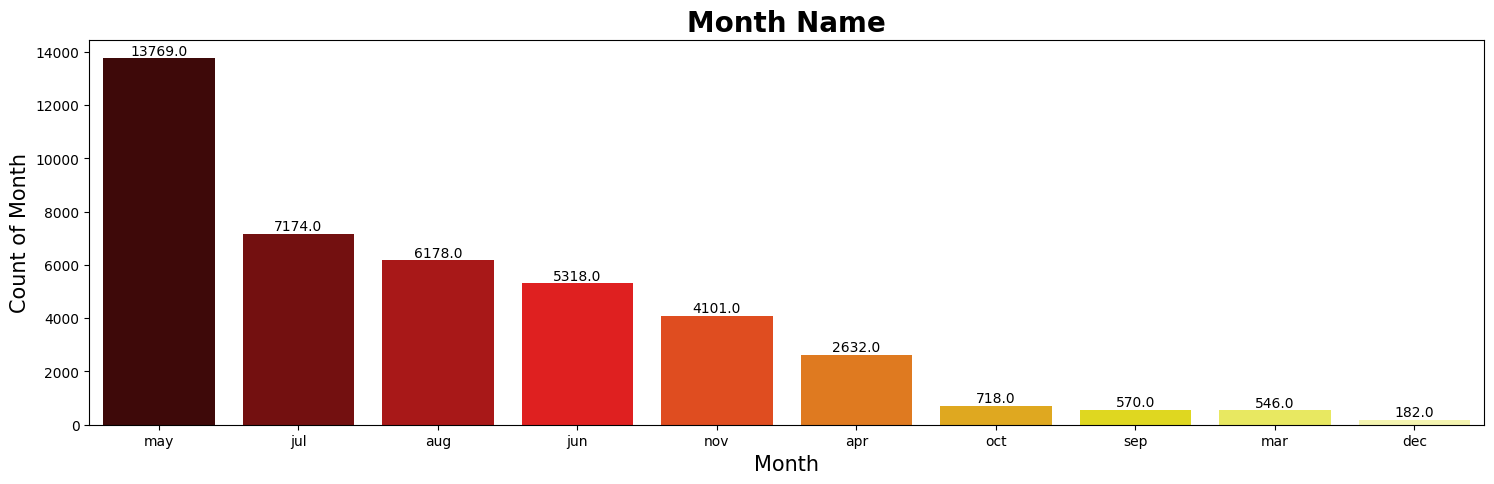

In [ ]:
# Month
f, ax = plt.subplots(figsize=(18, 5))
month = df['month'].value_counts()
cplot = sns.barplot(x=month.index, y=month, palette='hot')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height), xy=(count.get_x() + count.get_width() / 2, height),
                ha='center', va='bottom')
cplot.set_title('Month Name', fontsize=20, weight='bold')
cplot.set_ylabel('Count of Month', fontsize=15)
cplot.set_xlabel('Month', fontsize=15)
plt.show()


Most of the contact to the clients are made in the second and third quarters of the Portuguese financial year.

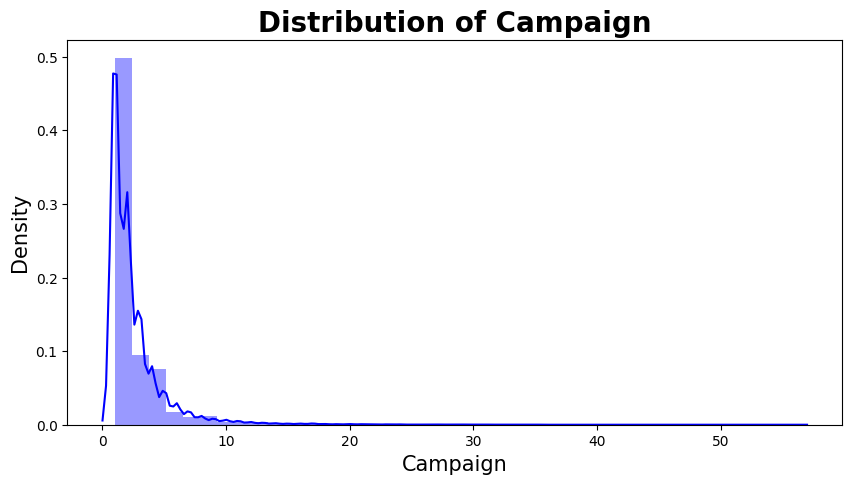

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(df['campaign'], color ='blue', bins = 40)
plt.xlabel('Campaign', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Distribution of Campaign', fontsize = 20, weight = 'bold')
plt.show();

In [ ]:
df.campaign.value_counts().head()

1    17642
2    10570
3     5341
4     2651
5     1599
Name: campaign, dtype: int64

Customers are contacted mostly once or twice during the campaign.

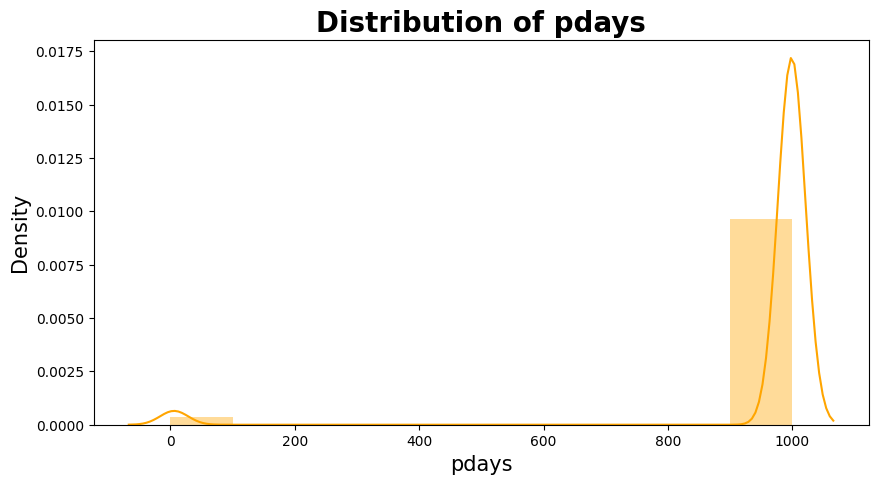

In [ ]:
# Pdays

plt.figure(figsize = (10,5))
sns.distplot(df['pdays'], color ='orange', bins = 10)
plt.xlabel('pdays', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Distribution of pdays', fontsize = 20, weight = 'bold')
plt.show();

In [ ]:
df.pdays.value_counts().head()

999    39673
3        439
6        412
4        118
9         64
Name: pdays, dtype: int64

82% of the clients are not contacted after the previous campaign.

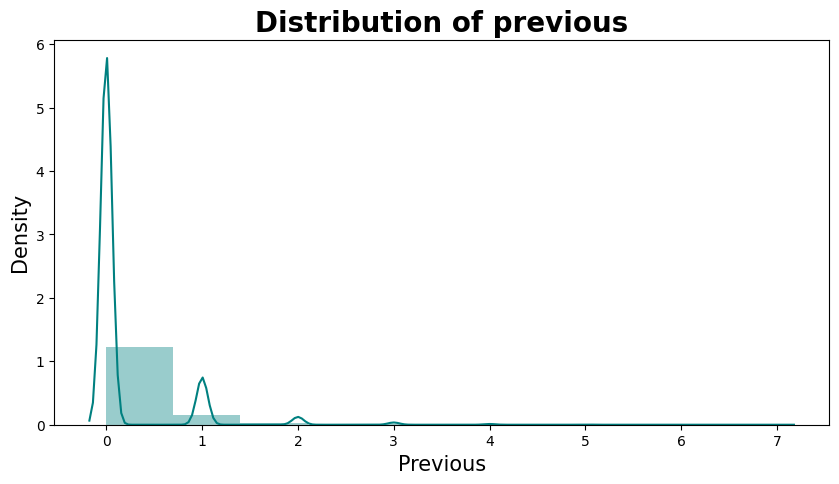

In [ ]:
# Previous

plt.figure(figsize = (10,5))
sns.distplot(df['previous'], color ='teal', bins = 10)
plt.xlabel('Previous', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Distribution of previous', fontsize = 20, weight = 'bold')
plt.show()

In [ ]:
df.previous.value_counts().head()

0    35563
1     4561
2      754
3      216
4       70
Name: previous, dtype: int64

82% of the clients were not contacted before this campaign.

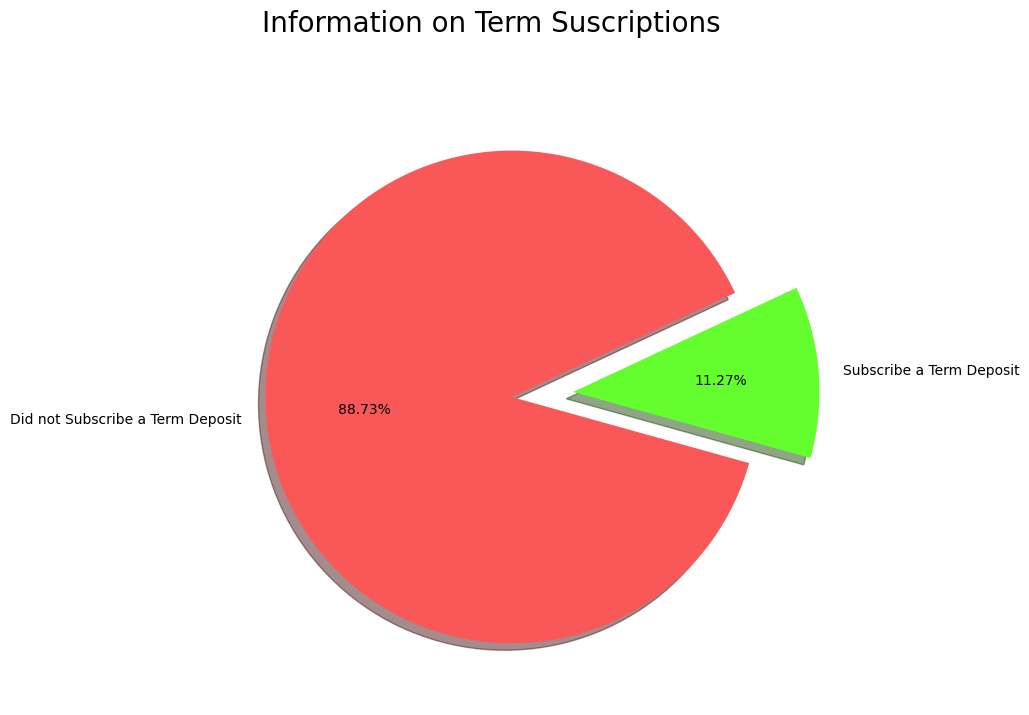

In [ ]:
 #inspection about Dependent variable

plt.figure(figsize=(16,8))

colors = ['#FA5858', '#64FE2E']
labels = 'Did not Subscribe a Term Deposit', 'Subscribe a Term Deposit'

plt.suptitle('Information on Term Suscriptions', fontsize = 20)

df_count = (df.y.value_counts())
total = sum(df_count)
df_percentage = (df_count)/total*100
plt.pie(df_percentage, explode=[0, 0.25], autopct = '%1.2f%%', shadow = True, colors = colors,
                                             labels = labels, startangle = 25)
plt.show();

The dataset is imbalanced. 88.3% of the dependent variable is ineffective i.e the customer doesnot subscribed to the term deposit and 11.7% is otherwise.

Bivariate Analysis

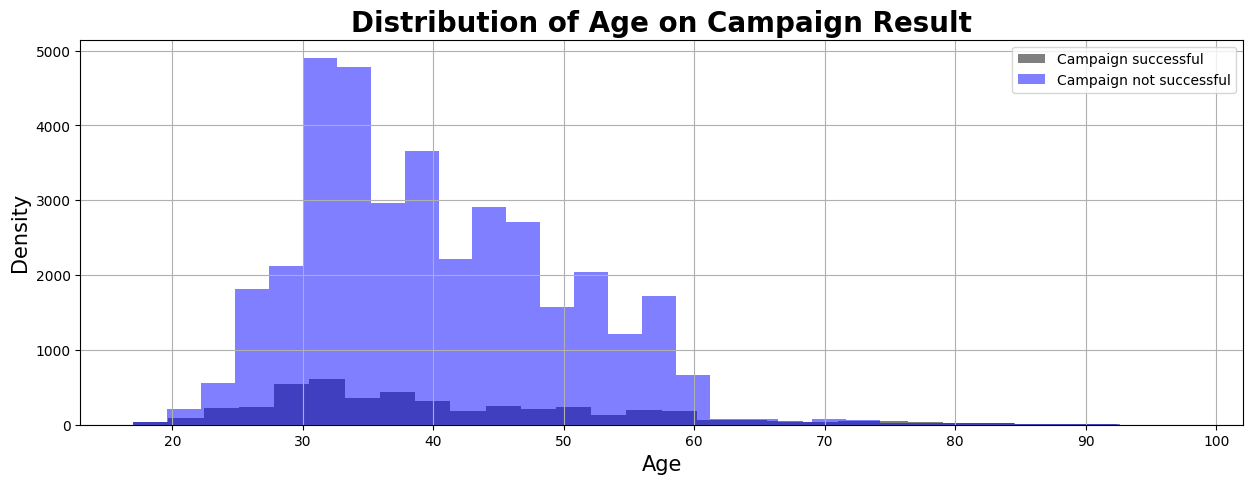

In [ ]:

# Comparing age distribution between converted vs unconverted clients

plt.figure(figsize = (15, 5))

df[df['y'] == 'yes']['age'].hist(alpha = 0.5,
                                 color = 'black',
                                 bins = 30,
                                 label = 'Campaign successful')

df[df['y'] == 'no']['age'].hist(alpha = 0.5,
                                color = 'blue',
                                bins = 30,
                                label = 'Campaign not successful')
plt.legend()
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Distribution of Age on Campaign Result', fontsize = 20, weight = 'bold')
plt.show();

Campaign seem to be most successful among younger < 20 years old and older clients > 60 years old.

In [ ]:
# Mean age by profession

df[['job', 'age']].groupby(by = ['job'], axis = 0).mean().sort_values(by = 'age', ascending = True)

,age
job,
student,25.894857
services,37.926430
admin.,38.187296
technician,38.507638
blue-collar,39.555760
unemployed,39.733728
self-employed,39.949331
entrepreneur,41.723214
management,42.362859


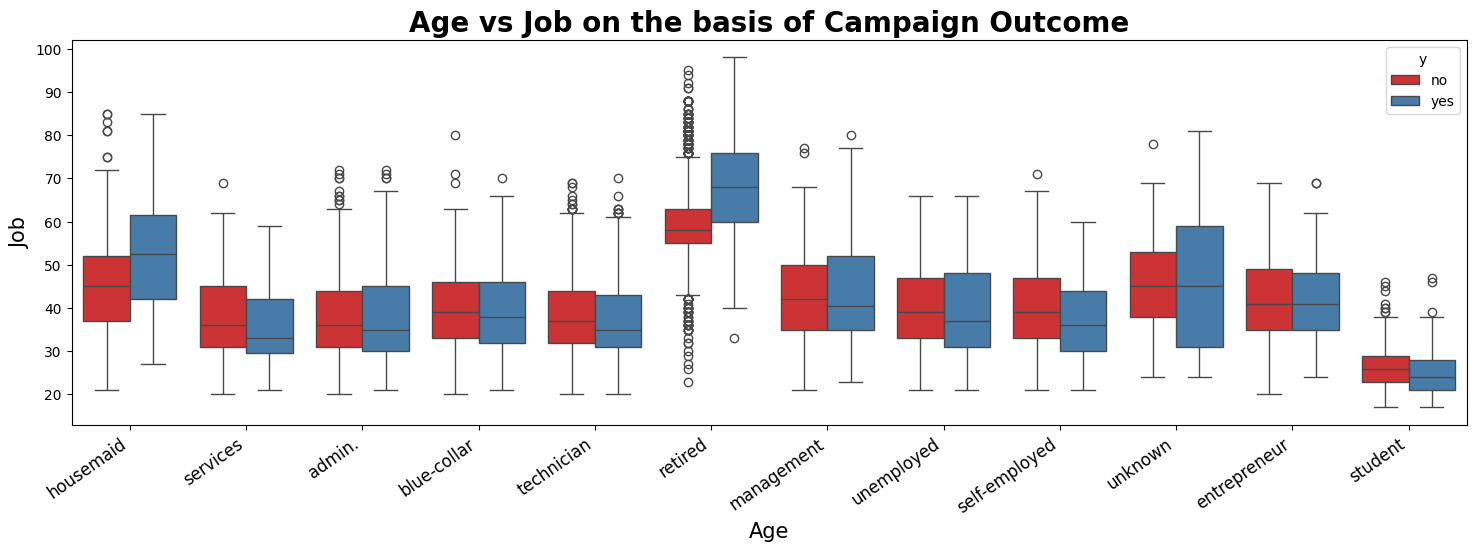

In [ ]:
# Plot age distribution of clients by profession and campaign result

plt.figure(figsize = (18, 5))
sns.boxplot(x = 'age', y = 'job', hue = 'y', data = df,  palette = "Set1")
plt.xticks(
    rotation = 35,
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 'large')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Job', fontsize = 15)
plt.title('Age vs Job on the basis of Campaign Outcome', fontsize = 20, weight = 'bold')
plt.show();

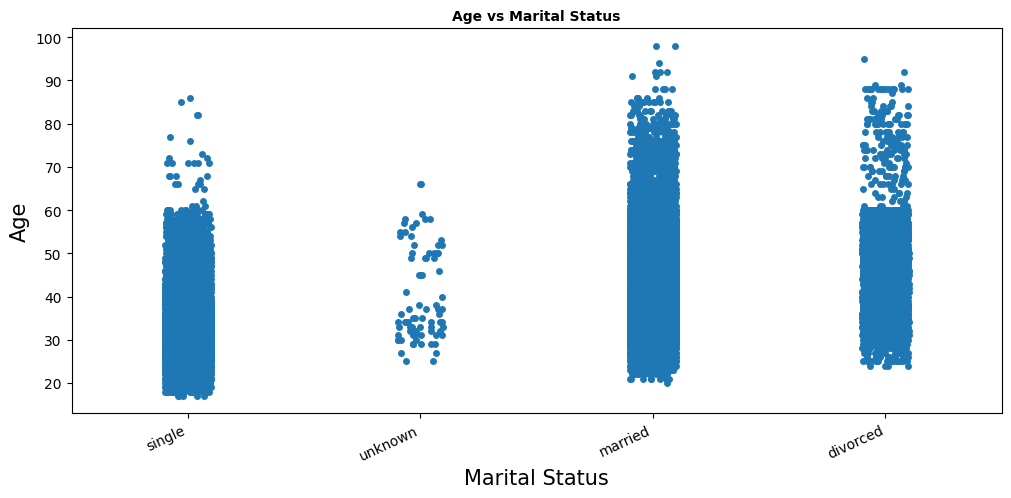

In [ ]:
# Plot age distribution of clients by marital status

marital_order = df[['marital', 'age']].groupby(by = ['marital'], axis = 0).mean().sort_values(by = 'age', ascending = True).index

plt.figure(figsize = (12, 5))
sns.stripplot(x = 'marital', y = 'age', order = marital_order, data = df)
plt.xticks(rotation = 25,
           horizontalalignment = 'right',
           fontweight = 'light',
           )
plt.xlabel('Marital Status', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.title('Age vs Marital Status', fontsize = 10, weight = 'bold')
plt.show();

Text(0, 0.5, 'Frequency of Purchase')

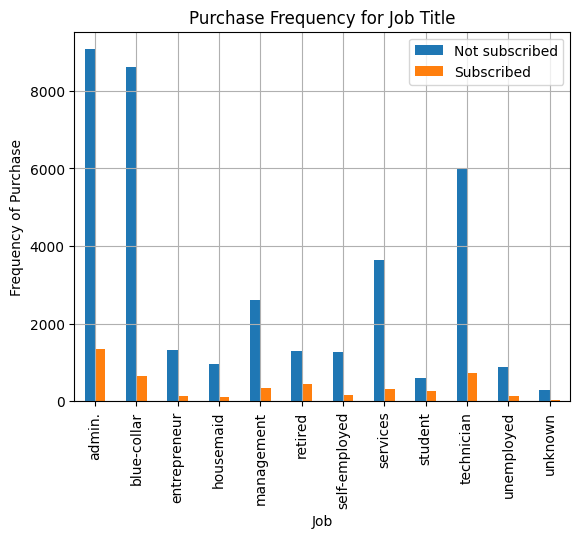

In [ ]:
table = pd.crosstab(df.job, df.y)
table.columns = ['Not subscribed', 'Subscribed']
table.plot(kind='bar')

plt.grid(True)

plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

The target customers are admins, blue-collars and techinicians but the frequency of students and retired people subscribed to the term deposit are pretty high (28.68% for students and 22.79% for retired people).

Text(0.5, 1.0, 'No of employees')

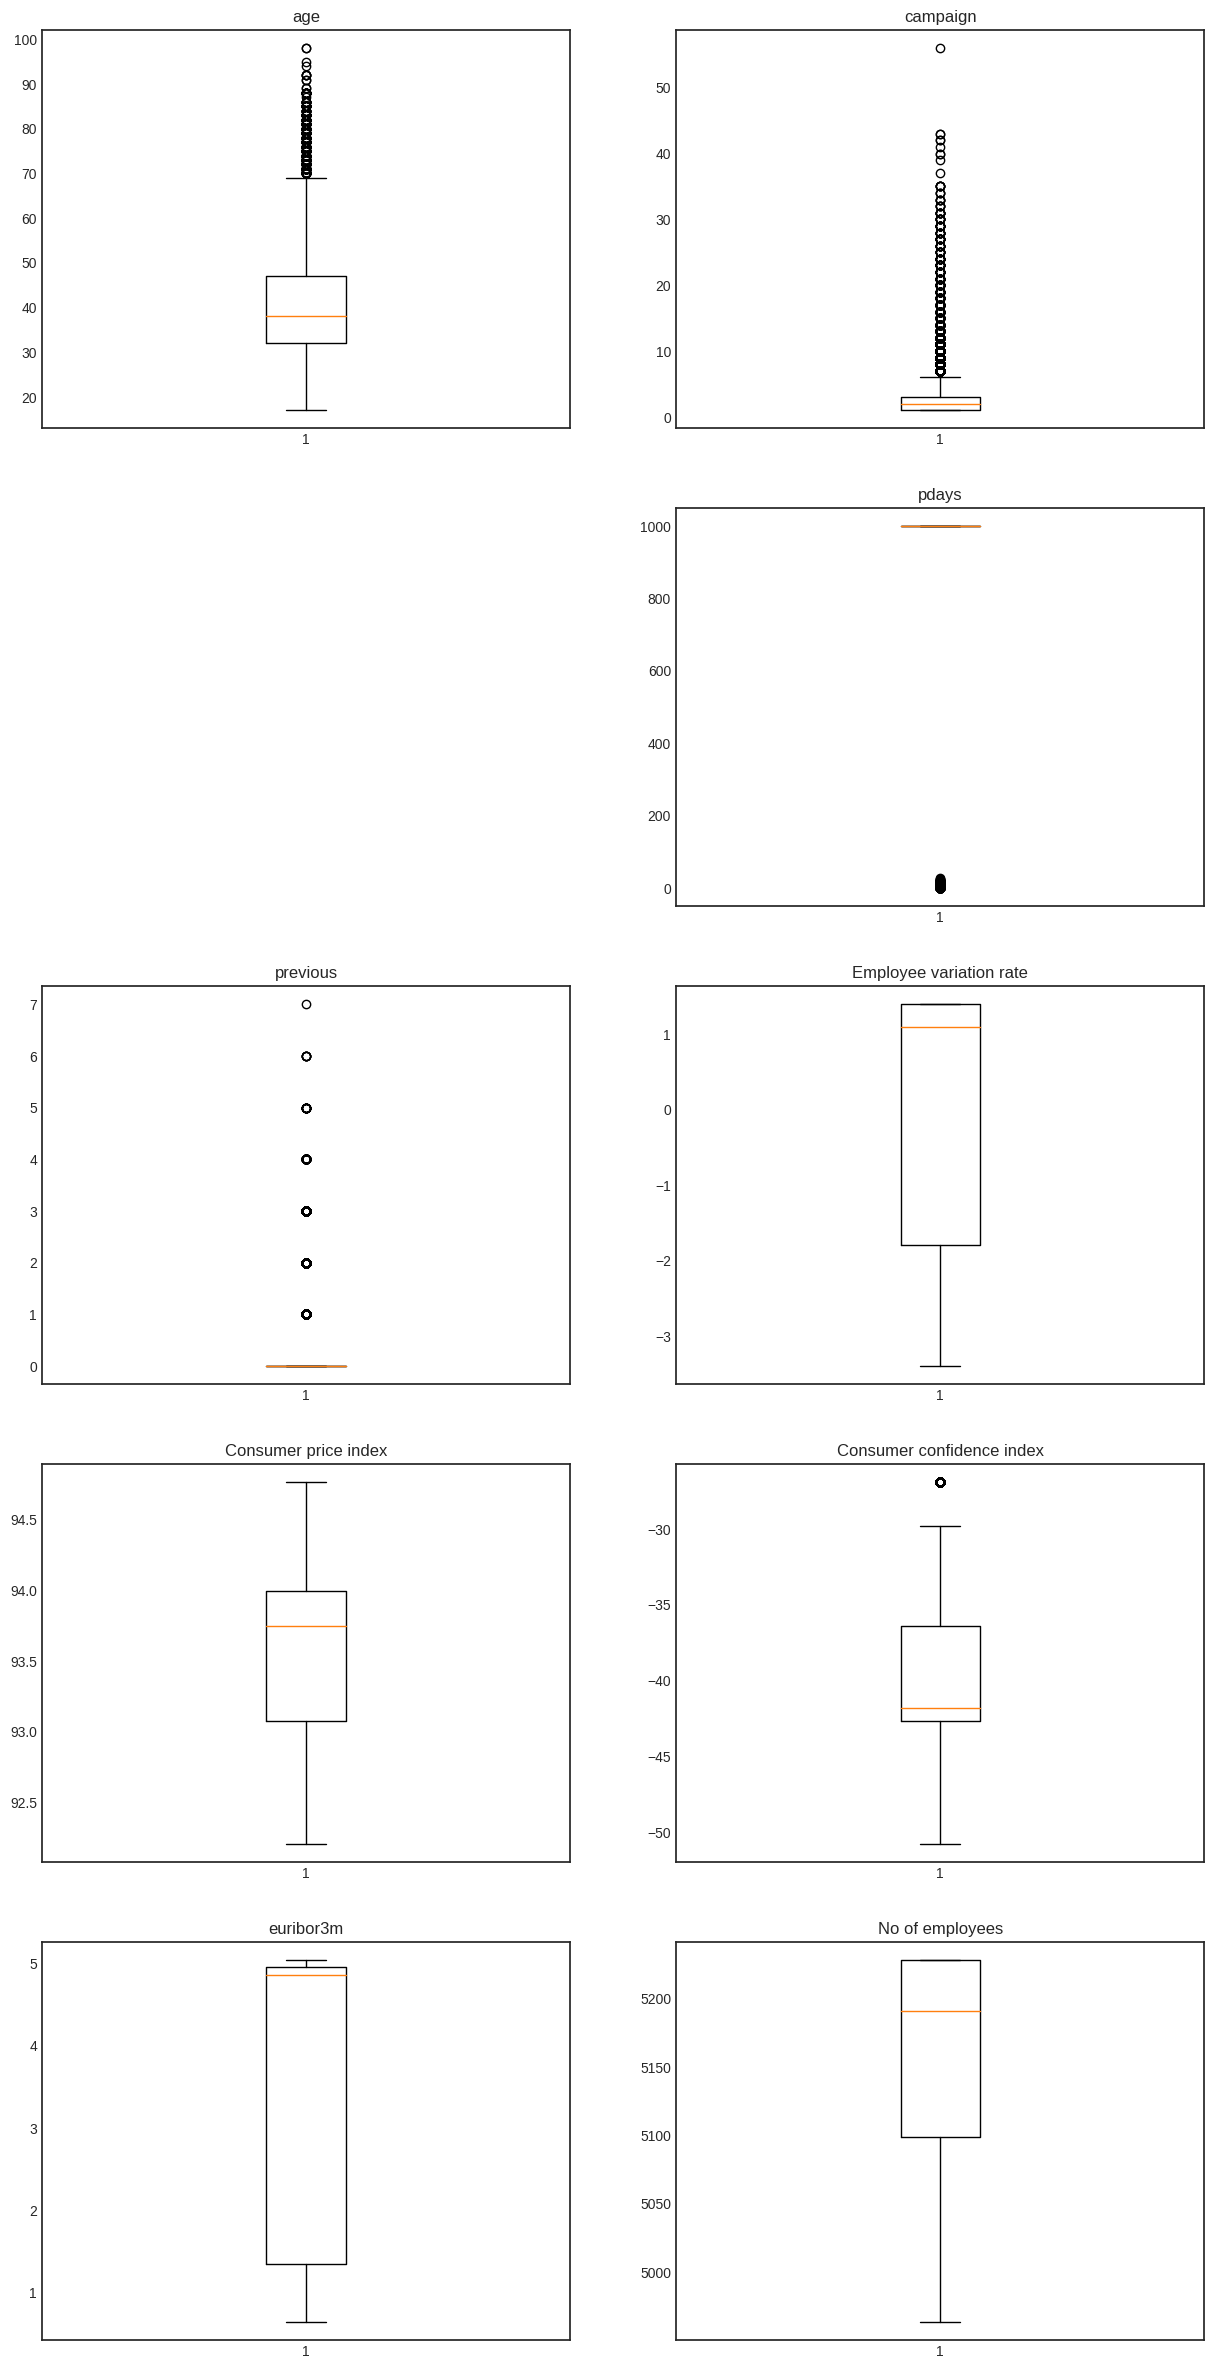

In [ ]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(df['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(df['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(df['pdays'])
ax.set_title('pdays')
ax=plt.subplot(525)
plt.boxplot(df['previous'])
ax.set_title('previous')
ax=plt.subplot(526)
plt.boxplot(df['emp.var.rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(527)
plt.boxplot(df['cons.price.idx'])
ax.set_title('Consumer price index')
ax=plt.subplot(528)
plt.boxplot(df['cons.conf.idx'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(529)
plt.boxplot(df['euribor3m'])
ax.set_title('euribor3m')
ax=plt.subplot(5,2,10)
plt.boxplot(df['nr.employed'])
ax.set_title('No of employees')

We see that many features doesn't have much outliers except for age and campaign. So, let's fix only those features using IQR method.

In [ ]:
numerical_features=['age','campaign']
for cols in numerical_features:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1

    filter = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)
    df=df.loc[filter]

Text(0.5, 1.0, 'campaign')

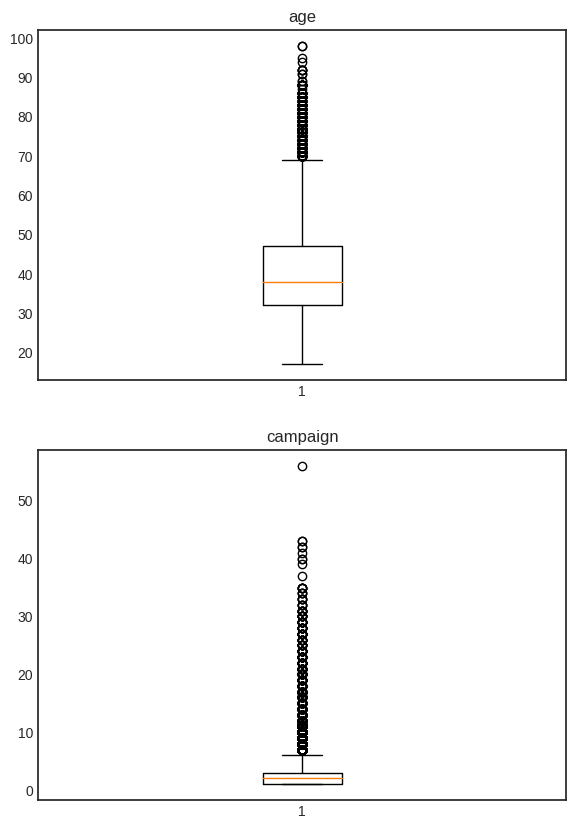

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df['age'])
ax.set_title('age')
ax=plt.subplot(223)
plt.boxplot(df['campaign'])
ax.set_title('campaign')

Encoding 999 in pdays as 0¶
Encoding 999 in pdays feature( i.e clients who haven't been contacted for the previous campaign) into 0

In [ ]:
df.loc[df['pdays'] == 999, 'pdays'] = 0

In [ ]:
df['pdays'].value_counts()

0     39688
3       439
6       412
4       118
9        64
2        61
7        60
12       58
10       52
5        46
13       36
11       28
1        26
15       24
14       20
8        18
16       11
17        8
18        7
22        3
19        3
21        2
25        1
26        1
27        1
20        1
Name: pdays, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
column=numeric_cols.columns
numeric_cols=scalar.fit_transform(numeric_cols)
df_numeric=pd.DataFrame(numeric_cols,columns=column)
df_numeric.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_categorical=pd.DataFrame()
for col in categorical_cols.columns:
    df_categorical[col]=le.fit_transform(categorical_cols[col])

In [ ]:
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,1,0,0,1,6,1,1,0
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,2,1,6,1,1,0


In [ ]:
df=pd.concat([df_numeric,df_categorical],axis=1)
df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,3,1,0,0,0,0,1,6,1,1,0
1,0.493827,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,7,1,3,1,0,0,1,6,1,1,0
2,0.246914,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,7,1,3,0,2,0,1,6,1,1,0
3,0.283951,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1,1,0,0,0,1,6,1,1,0
4,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,7,1,3,0,0,2,1,6,1,1,0


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
X=df.drop(['y'],axis=1)
y=df.y

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

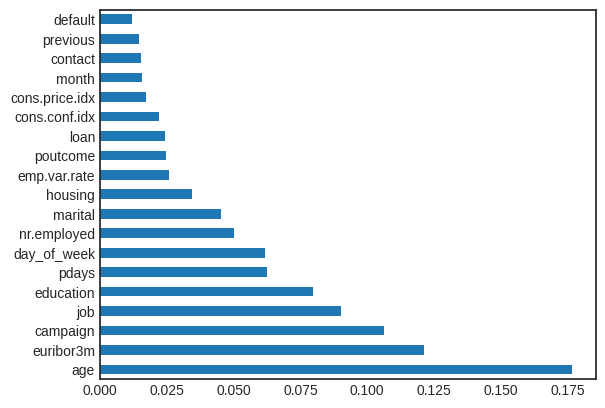

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Train and Test Split (80:20)¶
Let's drop the required features and split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(['pdays','month','cons.price.idx','loan','housing','emp.var.rate','y'],axis=1)
y=df.y

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (32950, 13)
Input Test: (8238, 13)
Output Training: (32950,)
Output Test: (8238,)


In [ ]:
np.random.seed(2)

preds_test = np.random.choice([0, 1], size=len(y_test))

f1_score(y_test, preds_test)

0.17732444095723812

In [ ]:
print("AUC on Test data is " +str(roc_auc_score(y_test,preds_test)))

AUC on Test data is 0.48563655756066054


In [ ]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, preds_test))

Confusion Matrix is:
[[3592 3702]
 [ 492  452]]


In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score



In [ ]:

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}


In [ ]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds


In [ ]:
clf.fit(X_test,y_test)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)



Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:

logreg = LogisticRegression(C = 0.1,
                            penalty = 'l1',
                            solver = 'liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [ ]:
lr = LogisticRegression(max_iter=7600,random_state = 1)
_ = lr.fit(X_train, y_train)

#predictions on test data
preds_test= lr.predict(X_test)

#f1 score on test set
f1_score(y_test, logreg.predict(X_test))

0.2890955198647506

In [ ]:
print("AUC on Test data is " +str(roc_auc_score(y_test,logreg.predict(X_test))))

AUC on Test data is 0.5859106683924098


In [ ]:

print(metrics.classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      7294
           1       0.72      0.18      0.29       944

    accuracy                           0.90      8238
   macro avg       0.81      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



In [ ]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,6661,633,7294
1,624,320,944
All,7285,953,8238


In [ ]:
dt = DecisionTreeClassifier(random_state = 1)
_ = dt.fit(X_train, y_train)

#predictions on test data
preds_test= dt.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)

0.3373748023194517

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

dt2 = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=30)

search = dt2.fit(X_train, y_train)

search.best_params_

{'min_samples_split': 20,
 'max_leaf_nodes': 32,
 'max_features': 0.8,
 'max_depth': 8,
 'criterion': 'entropy',
 'class_weight': {0: 1, 1: 3}}

In [ ]:
optimal_params = {
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 0.6,
 'max_leaf_nodes': 32,
 'min_samples_split': 20,
 'class_weight': {0: 1, 1: 3}}

dt2 = DecisionTreeClassifier(random_state = 1, **optimal_params)
_ = dt2.fit(X_train, y_train)


#predictions on test data
preds_test= dt2.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)

0.5024015369836695

In [ ]:
print("AUC on Test data is " +str(roc_auc_score(y_test,preds_test)))

AUC on Test data is 0.7348547738331482


In [ ]:

rf = RandomForestClassifier(random_state=1) #by default no of estimators=10
rf.fit(X_train, y_train)

#predictions on test data
preds_test= rf.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)

0.3840970350404312

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

rf2 = RandomizedSearchCV(RandomForestClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=30)

search = rf2.fit(X_train, y_train)

search.best_params_

{'min_samples_split': 40,
 'max_leaf_nodes': 128,
 'max_features': 0.4,
 'max_depth': 12,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 3}}

In [ ]:
optimal_params = {
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 0.6,
 'max_leaf_nodes': 64,
 'min_samples_split': 20,
 'class_weight': {0: 1, 1: 5}}

rf2 = RandomForestClassifier(random_state = 1, **optimal_params)
_ = rf2.fit(X_train, y_train)

#predictions on test data
preds_test= rf2.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)

0.5029505220154334

In [ ]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,6589,705,7294
1,390,554,944
All,6979,1259,8238


In [ ]:
print("AUC on Test data is " +str(roc_auc_score(y_test,preds_test)))

AUC on Test data is 0.7451048110125341
